# Assignment 1


## Q1. Compute Tokens, Tokens and TTR.

In [163]:
import numpy as np
import pandas as pd
data=pd.read_csv("C:/Users/Mohit Mina/Downloads/tweets-dataset.csv")
data=data.apply(lambda x: x.astype(str).str.lower())
from nltk.tokenize import word_tokenize
data['Tokens']=data['Sentence'].apply(word_tokenize) #tokenization
data

,Sentence,Tokens
0,"@bubblydentist @meetuunnglee nahi nahi, mere s...","[@, bubblydentist, @, meetuunnglee, nahi, nahi..."
1,going to the grammys first entertainment law b...,"[going, to, the, grammys, first, entertainment..."
2,bohot hi badiya ji aap sunao?,"[bohot, hi, badiya, ji, aap, sunao, ?]"
3,parvez musharraf is digvijay singh of pakistan...,"[parvez, musharraf, is, digvijay, singh, of, p..."
4,guddu ko bass john cena k sticker ki padii hai...,"[guddu, ko, bass, john, cena, k, sticker, ki, ..."
5,aman ki maa ki... asha https://twitter.com/ash...,"[aman, ki, maa, ki, ..., asha, https, :, //twi..."
6,pakistan can wait more more and more . . . ...,"[pakistan, can, wait, more, more, and, more, ...."
7,@sagarcasm jai mahesh !!,"[@, sagarcasm, jai, mahesh, !, !]"
8,"rt aap_najafgarh "" rt aapinnews : when ddca lo...","[rt, aap_najafgarh, ``, rt, aapinnews, :, when..."
9,"""kaam ho jayega, thoda kharcha paani lagega"" \...","[``, kaam, ho, jayega, ,, thoda, kharcha, paan..."


In [168]:
import re
list_of_tokens = [item for sublist in data['Tokens'].tolist() for item in sublist]
regex = re.compile(r'\W+')
tokens = [i for i in list_of_tokens if not regex.search(i)]
print("total number of tokens:",len(tokens))
types=set(tokens)                     # types of tokens
print("total number of types:",len(types))
print("TTR:",len(types)/len(tokens)) # finding TTR



total number of tokens: 306942
total number of types: 36438
TTR: 0.11871298160564536


## Q2 Check if Zipf's Law holds true for meanings and lengths.


In [173]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from collections import Counter

words=['wait','about','new','match','good','ban','internet','availability','one'] #words 

df=pd.DataFrame({'Words':words})
df['meanings']=df['Words'].apply(wordnet.synsets)         #meanings of the words
df['number of meanings']=df['meanings'].apply(len)        #number of meanings

a=[]
for item in words:
    a.append(Counter(list_of_tokens)[item])               #list of frequency of words

df['frequency']=a
df['word length']=df['Words'].apply(len)
df = df.sort_values('frequency',ascending=True)           #sorting the words based on their frequency

df

,Words,meanings,number of meanings,frequency,word length
7,availability,[Synset('handiness.n.02')],1,2,12
6,internet,[Synset('internet.n.01')],1,17,8
0,wait,"[Synset('delay.n.01'), Synset('wait.n.02'), Sy...",6,114,4
1,about,"[Synset('about.s.01'), Synset('approximately.r...",8,158,5
5,ban,"[Synset('prohibition.n.02'), Synset('ban.n.02'...",9,173,3
8,one,"[Synset('one.n.01'), Synset('one.n.02'), Synse...",9,214,3
3,match,"[Synset('match.n.01'), Synset('match.n.02'), S...",19,216,5
2,new,"[Synset('new.a.01'), Synset('fresh.s.04'), Syn...",12,219,3
4,good,"[Synset('good.n.01'), Synset('good.n.02'), Syn...",27,221,4


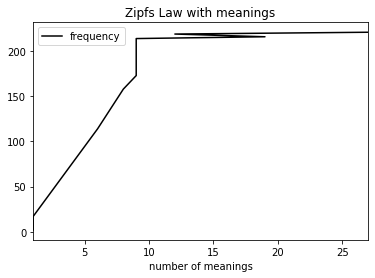

In [176]:
df.plot(kind='line',x='number of meanings',y='frequency',color='black')
plt.title('Zipfs Law with meanings')
plt.show()

In [202]:
from collections import Counter
counts=Counter(tokens)
counts_dict = (pd.DataFrame.from_dict(counts, orient='index')).reset_index()
counts_dict['word length']=counts_dict['index'].apply(len)
counts_dict

,index,0,word length
0,bubblydentist,2,13
1,meetuunnglee,248,12
2,nahi,3106,4
3,mere,461,4
4,saath,303,5
5,jaakar,19,6
6,pachtaogi,1,9
7,ye,1854,2
8,uunnglee,1,8
9,is,1300,2


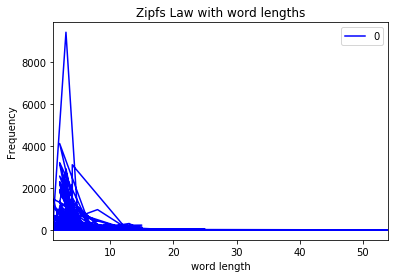

In [201]:
counts_dict.plot(kind='line',x='word length',y=0,color='blue')
plt.title('Zipfs Law with word lengths')
plt.ylabel('Frequency')
plt.show()

## Q3 Plot Heap's Law.

In [77]:
no_of_tokens=[]
no_of_types=[]
for i in range(3000):
    total_tokens = tokens[:i*100]
    no_of_tokens.append(len(total_tokens))
    no_of_types.append(len(set(total_tokens)))

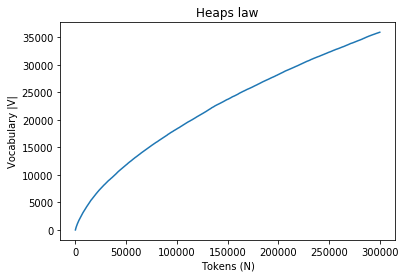

In [79]:
plt.plot(no_of_tokens,no_of_types)
plt.xlabel('Tokens (N)')
plt.ylabel('Vocabulary |V|')
plt.title('Heaps law')
plt.show()

In [185]:
#finding the values of K and Beta
def func(no_of_tokens, K, B):
    no_of_types=K*(no_of_tokens**B)
    return no_of_types

from scipy.optimize import curve_fit 
parameter, parameter_covariance = curve_fit(func, no_of_tokens, no_of_types) 
new_no_of_types = (parameter[0]*(no_of_tokens**parameter[1])) 

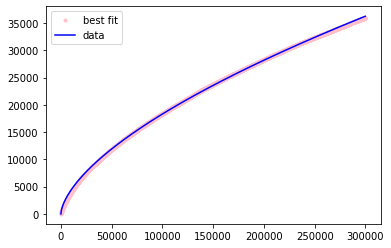

K =  14.354641392210063
Beta =  0.6211734453147908


In [197]:
plt.plot(no_of_tokens,no_of_types,'.',label ="best fit",color ='pink') 
plt.plot(no_of_tokens,new_no_of_types,'-',label ="data",color ='blue') 
plt.legend() 
plt.show() 
print("K = ",parameter[0])
print("Beta = ", parameter[1])